In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PEPit import PEP as PEPit
from pkg import PEP

In [2]:
def wc_gradient_descent(L, mu, gamma, n, wrapper="cvxpy", solver=None, verbose=1):
    from PEPit.functions import SmoothStronglyConvexFunction
    
    # Instantiate PEP
    problem = PEPit()

    # Declare a smooth convex function
    func = problem.declare_function(SmoothStronglyConvexFunction, L=L, mu=mu)

    # Then define the starting point x0 of the algorithm
    x0 = problem.set_initial_point()
    y0 = problem.set_initial_point()

    # Set the initial constraint that is the distance between x0 and x^*
    problem.set_initial_condition((x0 - y0) ** 2 <= 1)

    # Run n steps of the GD method
    x = x0
    y = y0
    for _ in range(n):
        x = x - gamma * func.gradient(x)
        y = y - gamma * func.gradient(y)

    # Set the performance metric to the function values accuracy
    problem.set_performance_metric((x - y) ** 2)

    # Solve the PEP
    pepit_verbose = max(verbose, 0)
    pepit_tau = problem.solve(wrapper=wrapper, solver=solver, verbose=pepit_verbose)

    return pepit_tau

In [3]:
def cma_gradient_descent(d, L, mu, gamma, n, verbose=1):
  from pkg.functions import SmoothStronglyConvexFunction
  
  f = SmoothStronglyConvexFunction(L=L, mu=mu)
  x0 = f.gen_initial_point()
  y0 = f.gen_initial_point()

  pep = PEP(f)
  pep.set_initial_condition((x0 - y0).norm() ** 2 <= 1)
  
  x = x0
  y = y0
  for _ in range(n):
    x = x - gamma * f.grad(x)
    y = y - gamma * f.grad(y)

  pep.set_metric((x - y).norm() ** 2)

  _, gpep_tau = pep.solve(d, tolx=1e-8, verbose=verbose)
  return gpep_tau

In [4]:
L = 1
mu = 0.1
gamma = 1 / L
n = 2

verbose = 1

In [5]:
ns = list(range(1, 6))

theoretical_taus = [max((1 - L * gamma) ** 2, (1 - mu * gamma) ** 2) ** n for n in ns]
pepit_taus = [wc_gradient_descent(L=L, mu=mu, gamma=gamma, n=n, verbose=verbose) for n in ns]
gpep_taus = [cma_gradient_descent(d=4, L=L, mu=mu, gamma=gamma, n=n, verbose=verbose) for n in ns]

(PEPit) Setting up the problem: size of the Gram matrix: 4x4
(PEPit) Setting up the problem: performance measure is the minimum of 1 element(s)
(PEPit) Setting up the problem: Adding initial conditions and general constraints ...
(PEPit) Setting up the problem: initial conditions and general constraints (1 constraint(s) added)
(PEPit) Setting up the problem: interpolation conditions for 1 function(s)
			Function 1 : Adding 2 scalar constraint(s) ...
			Function 1 : 2 scalar constraint(s) added
(PEPit) Setting up the problem: additional constraints for 0 function(s)
(PEPit) Compiling SDP
(PEPit) Calling SDP solver
(PEPit) Solver status: optimal (wrapper:cvxpy, solver: SCS); optimal value: 0.8100002239779404
(PEPit) Postprocessing: solver's output is not entirely feasible (smallest eigenvalue of the Gram matrix is: -5.62e-08 < 0).
 Small deviation from 0 may simply be due to numerical error. Big ones should be deeply investigated.
 In any case, from now the provided values of parameters 

/home/gaetanserre/miniconda3/envs/ML/lib/python3.12/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=1244)
  warnings.warn(msg + ' (' +


 1500  18000 -8.099999977475222e-01 2.7e+01 2.88e-06  2e-06  5e-06 0:01.1
 1600  19200 -8.099999994385187e-01 3.7e+01 1.52e-06  1e-06  2e-06 0:01.1
 1700  20400 -8.099999997772732e-01 6.1e+01 7.31e-07  4e-07  1e-06 0:01.2
 1800  21600 -8.099999997980184e-01 6.7e+01 5.07e-07  2e-07  7e-07 0:01.3
 1900  22800 -8.099999999255512e-01 8.6e+01 2.58e-07  1e-07  4e-07 0:01.4
 2000  24000 -8.099999998925546e-01 1.2e+02 2.09e-07  1e-07  3e-07 0:01.4
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
 2100  25200 -8.099999999143408e-01 1.6e+02 6.20e-08  3e-08  7e-08 0:01.5
 2200  26400 1.977714704988247e+04 2.4e+02 7.93e-08  4e-08  1e-07 0:01.6
 2300  27600 -8.099999999137796e-01 3.3e+02 9.53e-08  5e-08  1e-07 0:01.7
 2400  28800 -8.099999999189934e-01 3.7e+02 3.82e-08  2e-08  6e-08 0:01.8
 2500  30000 -8.099999999211627e-01 5.0e+02 2.84e-08  1e-08  5e-08 0:01.8
 2600  31200 -8.099999999222106e-01 7.2e+02 2.87e-08  2e-08  5e-08 0:01.9
 2700  32400 -8.099999999320647e-01 9.9e+

/home/gaetanserre/miniconda3/envs/ML/lib/python3.12/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=5640)
  warnings.warn(msg + ' (' +


 5800  75400 -6.560999987939068e-01 4.0e+00 1.46e-06  1e-06  2e-06 0:10.9
 5900  76700 -6.560999995773629e-01 5.4e+00 7.88e-07  7e-07  9e-07 0:11.1
 6000  78000 -6.560999997887222e-01 7.5e+00 2.72e-07  2e-07  3e-07 0:11.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
 6100  79300 -6.560999998471315e-01 1.0e+01 2.26e-07  2e-07  3e-07 0:11.5
 6200  80600 -6.560999998760808e-01 1.5e+01 2.52e-07  2e-07  3e-07 0:11.7
 6300  81900 -6.560999999195506e-01 2.2e+01 1.50e-07  1e-07  2e-07 0:11.9
 6400  83200 -6.560999999249106e-01 2.6e+01 1.11e-07  7e-08  2e-07 0:12.1
 6500  84500 -6.560999999286107e-01 2.8e+01 5.58e-08  4e-08  8e-08 0:12.3
 6600  85800 -6.560999999334221e-01 2.8e+01 5.21e-08  3e-08  7e-08 0:12.5
 6700  87100 -6.560999999344204e-01 3.1e+01 4.86e-08  3e-08  7e-08 0:12.7
 6800  88400 -6.560999999334596e-01 3.6e+01 3.16e-08  2e-08  4e-08 0:12.9
 6900  89700 -6.560999999270889e-01 3.7e+01 3.04e-08  2e-08  4e-08 0:13.1
 7000  91000 -6.560999999315951e-01 4.5e

/home/gaetanserre/miniconda3/envs/ML/lib/python3.12/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=9634)
  warnings.warn(msg + ' (' +


 9700 135800 -5.314409289988302e-01 2.1e+00 5.07e-07  5e-07  5e-07 0:34.2
 9800 137200 -5.314409355398128e-01 3.4e+00 6.83e-07  6e-07  8e-07 0:34.6
 9900 138600 -5.314409421152546e-01 5.3e+00 5.82e-07  5e-07  8e-07 0:34.9
10000 140000 -5.314409454924676e-01 7.4e+00 4.51e-07  4e-07  6e-07 0:35.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
10100 141400 -5.314409487374345e-01 1.1e+01 4.14e-07  4e-07  6e-07 0:35.6
10200 142800 -5.314409523961902e-01 1.9e+01 3.51e-07  3e-07  6e-07 0:36.0
10300 144200 -5.314409560289605e-01 3.5e+01 3.77e-07  3e-07  8e-07 0:36.3
10400 145600 -5.314409605264752e-01 5.1e+01 8.23e-07  7e-07  2e-06 0:36.7
10500 147000 -5.314409646460831e-01 6.4e+01 7.26e-07  6e-07  2e-06 0:37.0
10600 148400 -5.314409659449109e-01 6.7e+01 4.51e-07  4e-07  1e-06 0:37.4
10700 149800 -5.314409667650523e-01 7.4e+01 1.55e-07  1e-07  4e-07 0:37.8
10800 151200 -5.314409671239779e-01 8.3e+01 8.56e-08  7e-08  2e-07 0:38.1
10900 152600 -5.314409676955438e-01 1.0e

/home/gaetanserre/miniconda3/envs/ML/lib/python3.12/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=29919)
  warnings.warn(msg + ' (' +


30000 450000 -4.304625581032060e-01 2.4e+00 9.57e-06  9e-06  1e-05 3:19.5
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
30100 451500 -4.304626692444943e-01 4.1e+00 1.71e-05  2e-05  2e-05 3:20.2
30200 453000 -4.304627208346802e-01 4.5e+00 1.71e-05  2e-05  2e-05 3:20.8
30300 454500 -4.304627827217610e-01 5.3e+00 1.95e-05  2e-05  3e-05 3:21.5
30400 456000 -4.304629031874759e-01 7.9e+00 2.68e-05  2e-05  5e-05 3:22.2
30500 457500 -4.304630342647343e-01 1.1e+01 3.01e-05  3e-05  6e-05 3:22.8
30600 459000 -4.304631097611074e-01 1.3e+01 2.35e-05  2e-05  5e-05 3:23.5
30700 460500 -4.304631325098687e-01 1.4e+01 1.88e-05  2e-05  4e-05 3:24.2
30800 462000 -4.304631633648271e-01 1.4e+01 1.21e-05  1e-05  2e-05 3:24.9
30900 463500 -4.304631806808558e-01 1.6e+01 7.47e-06  6e-06  1e-05 3:25.5
31000 465000 -4.304632017591485e-01 1.9e+01 7.41e-06  6e-06  1e-05 3:26.2
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
31100 466500 -4.304632603082922e-01 2.8e+0

/home/gaetanserre/miniconda3/envs/ML/lib/python3.12/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=45915)
  warnings.warn(msg + ' (' +


46000 736000 -3.486760889970577e-01 3.2e+00 2.41e-06  2e-06  3e-06 8:50.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
46100 737600 -3.486761450618917e-01 4.9e+00 7.65e-06  7e-06  1e-05 8:51.5
46200 739200 -3.486761985840693e-01 5.5e+00 9.21e-06  9e-06  2e-05 8:52.7
46300 740800 -3.486762637466550e-01 6.4e+00 1.70e-05  2e-05  3e-05 8:53.8
46400 742400 -3.486763426071690e-01 7.0e+00 1.59e-05  1e-05  3e-05 8:55.0
46500 744000 -3.486764145249334e-01 7.6e+00 2.00e-05  2e-05  4e-05 8:56.1
46600 745600 -3.486765082830906e-01 9.0e+00 2.22e-05  2e-05  4e-05 8:57.3
46700 747200 -3.486765841566251e-01 1.0e+01 1.94e-05  2e-05  4e-05 8:58.5
46800 748800 -3.486766438645502e-01 1.2e+01 1.62e-05  1e-05  3e-05 8:59.6
46900 750400 -3.486766856124311e-01 1.4e+01 1.17e-05  1e-05  2e-05 9:00.8
47000 752000 -3.486767136256670e-01 1.6e+01 1.23e-05  1e-05  2e-05 9:01.9
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
47100 753600 -3.486767511577068e-01 2.1e+0

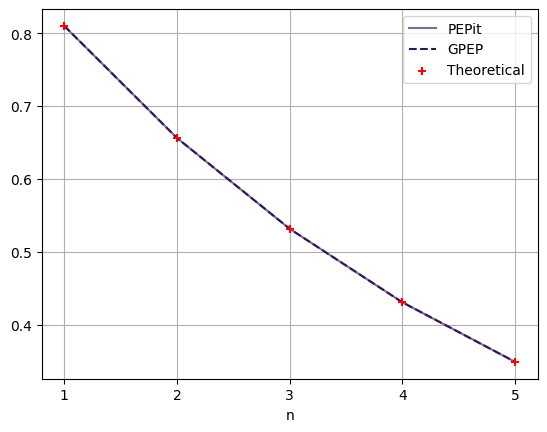

In [6]:
plt.plot(ns, pepit_taus, color="#7F6A93", label="PEPit")
plt.plot(ns, gpep_taus, color="#341655", linestyle="--", label="GPEP")
plt.scatter(ns, theoretical_taus, marker='+', color='r', label="Theoretical", zorder=9)
plt.xlabel("n")
plt.xticks(ns)
plt.grid("on")
plt.legend()

In [7]:
gammas = np.linspace(0, 2, 5)
theoretical_taus = [max((1 - L * gamma) ** 2, (1 - mu * gamma) ** 2) ** n for gamma in gammas]
pepit_taus = [wc_gradient_descent(L=L, mu=mu, gamma=gamma, n=n, verbose=verbose) for gamma in gammas]
gpep_taus = [cma_gradient_descent(d=4, L=L, mu=mu, gamma=gamma, n=n, verbose=verbose) for gamma in gammas]

(PEPit) Setting up the problem: size of the Gram matrix: 4x4
(PEPit) Setting up the problem: performance measure is the minimum of 1 element(s)
(PEPit) Setting up the problem: Adding initial conditions and general constraints ...
(PEPit) Setting up the problem: initial conditions and general constraints (1 constraint(s) added)
(PEPit) Setting up the problem: interpolation conditions for 1 function(s)
			Function 1 : Adding 2 scalar constraint(s) ...
			Function 1 : 2 scalar constraint(s) added
(PEPit) Setting up the problem: additional constraints for 0 function(s)
(PEPit) Compiling SDP
(PEPit) Calling SDP solver
(PEPit) Solver status: optimal (wrapper:cvxpy, solver: SCS); optimal value: 1.0000001698061742
(PEPit) Primal feasibility check:
		The solver found a Gram matrix that is positive semi-definite
		All the primal scalar constraints are verified up to an error of 4.3864339938082253e-07
(PEPit) Dual feasibility check:
		The solver found a residual matrix that is positive semi-defin

/home/gaetanserre/miniconda3/envs/ML/lib/python3.12/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=2355)
  warnings.warn(msg + ' (' +


 2500  32500 4.024686473012775e+01 4.3e+00 2.31e-08  2e-08  3e-08 0:04.3
 2600  33800 1.182515541812820e+01 9.0e+00 9.41e-09  6e-09  1e-08 0:04.4
 2615  33995 9.049597840705900e+00 1.0e+01 7.65e-09  5e-09  9e-09 0:04.5
termination on tolx=1e-08 (Tue Jul  2 15:34:16 2024)
final/bestever f-value = 8.161419e+00 7.939375e+00 after 33996/33715 evaluations
incumbent solution: [ 19.65898815 -24.42624398  -4.72010476  16.81849454  19.08476433
 -24.89107372  -4.91839271  17.41623328 ...]
std deviations: [7.70426776e-09 8.30638361e-09 8.53470005e-09 8.93653367e-09
 8.19951631e-09 8.15787040e-09 7.65185295e-09 9.07397504e-09 ...]
Obj= 0.9424093511668333 Constraints= [-1.42641321e-01  3.99680289e-15 -1.42641335e-01 -4.63601881e-02
 -4.63601983e-02  4.44089210e-16  3.99680289e-15 -1.42641320e-01
 -1.42641335e-01 -4.63601766e-02  4.44089210e-16 -4.63601867e-02
 -5.75906488e-02]
(6_w,13)-aCMA-ES (mu_w=4.0,w_1=38%) in dimension 28 (seed=1031808, Tue Jul  2 15:34:16 2024)
Iterat #Fevals   function valu

/home/gaetanserre/miniconda3/envs/ML/lib/python3.12/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=4369)
  warnings.warn(msg + ' (' +


 4500  58500 -8.145062499061330e-01 3.0e+00 1.20e-07  1e-07  1e-07 0:07.9
 4600  59800 -8.145062499211531e-01 3.9e+00 8.03e-08  7e-08  1e-07 0:08.1
 4700  61100 -8.145062499190719e-01 4.9e+00 4.41e-08  4e-08  6e-08 0:08.3
 4800  62400 -8.145062499383724e-01 5.2e+00 2.08e-08  2e-08  3e-08 0:08.4
 4900  63700 -8.145062499311926e-01 6.5e+00 2.05e-08  2e-08  3e-08 0:08.6
 5000  65000 -8.145062499335726e-01 8.5e+00 2.40e-08  2e-08  3e-08 0:08.8
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
 5100  66300 -8.145062499374111e-01 9.8e+00 1.57e-08  1e-08  2e-08 0:09.0
 5200  67600 -8.145062499387508e-01 1.1e+01 2.20e-08  2e-08  3e-08 0:09.1
 5300  68900 -8.145062499432827e-01 1.3e+01 2.17e-08  2e-08  3e-08 0:09.3
 5400  70200 -8.145062499378590e-01 1.5e+01 1.54e-08  1e-08  2e-08 0:09.5
 5500  71500 -8.145062499390924e-01 1.6e+01 1.30e-08  8e-09  2e-08 0:09.7
 5600  72800 -8.145062499366967e-01 1.9e+01 7.31e-09  5e-09  1e-08 0:09.9
 5700  74100 -8.145062499282113e-01 2.2e

/home/gaetanserre/miniconda3/envs/ML/lib/python3.12/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=5014)
  warnings.warn(msg + ' (' +


 5200  67600 -6.560999962471614e-01 6.2e+00 1.14e-06  9e-07  2e-06 0:08.9
 5300  68900 -6.560999979904163e-01 1.0e+01 1.46e-06  1e-06  2e-06 0:09.1
 5400  70200 -6.560999991794472e-01 1.3e+01 5.84e-07  4e-07  9e-07 0:09.3
 5500  71500 -6.560999995153863e-01 1.6e+01 3.34e-07  2e-07  5e-07 0:09.4
 5600  72800 -6.560999996148249e-01 1.9e+01 2.39e-07  2e-07  4e-07 0:09.6
 5700  74100 -6.560999996567520e-01 2.2e+01 8.29e-08  6e-08  1e-07 0:09.8
 5800  75400 -6.560999996837066e-01 2.3e+01 7.42e-08  5e-08  1e-07 0:10.0
 5900  76700 -6.560999997056491e-01 2.8e+01 6.98e-08  5e-08  1e-07 0:10.1
 6000  78000 1.534116209242112e+03 2.7e+01 6.95e-08  5e-08  1e-07 0:10.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
 6100  79300 -6.560999997107068e-01 3.2e+01 7.21e-08  5e-08  1e-07 0:10.5
 6200  80600 -6.560999997024741e-01 3.6e+01 5.76e-08  4e-08  1e-07 0:10.6
 6300  81900 2.070575974740996e+03 3.8e+01 6.76e-08  4e-08  1e-07 0:10.8
 6400  83200 -6.560999996974515e-01 4.3e+0

/home/gaetanserre/miniconda3/envs/ML/lib/python3.12/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=8020)
  warnings.warn(msg + ' (' +


 8200 106600 -5.220035692977286e-01 5.4e+00 5.68e-05  5e-05  8e-05 0:13.8
 8300 107900 -5.220037330974980e-01 8.2e+00 6.84e-05  6e-05  9e-05 0:14.0
 8400 109200 -5.220038806257888e-01 1.5e+01 2.66e-05  2e-05  4e-05 0:14.2
 8500 110500 -5.220039840452906e-01 2.7e+01 2.72e-05  2e-05  6e-05 0:14.3
 8600 111800 -5.220041201294989e-01 5.5e+01 2.79e-05  2e-05  8e-05 0:14.5
 8700 113100 -5.220042186576134e-01 7.7e+01 1.57e-05  1e-05  5e-05 0:14.8
 8800 114400 -5.220043625606858e-01 1.7e+02 3.84e-05  3e-05  2e-04 0:15.0
 8900 115700 -5.220045419014780e-01 2.0e+02 3.72e-05  3e-05  2e-04 0:15.1
 9000 117000 -5.220046802460421e-01 2.2e+02 3.70e-05  3e-05  2e-04 0:15.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
 9100 118300 -5.220048098074308e-01 2.8e+02 3.58e-05  3e-05  2e-04 0:15.5
 9200 119600 -5.220049432962907e-01 3.5e+02 4.05e-05  3e-05  2e-04 0:15.7
 9300 120900 -5.220051165098570e-01 4.9e+02 8.81e-05  6e-05  5e-04 0:15.8
 9400 122200 -5.220052640576330e-01 5.2e

/home/gaetanserre/miniconda3/envs/ML/lib/python3.12/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=6986)
  warnings.warn(msg + ' (' +


 7100  92300 -9.972963656982422e-01 3.5e+00 1.08e-03  1e-03  1e-03 0:12.0
 7200  93600 -9.974171529992844e-01 6.6e+00 8.33e-04  7e-04  1e-03 0:12.1
 7300  94900 -9.975348026146456e-01 1.3e+01 6.39e-04  5e-04  1e-03 0:12.3
 7400  96200 -9.976761682386486e-01 3.5e+01 8.47e-04  7e-04  2e-03 0:12.5
 7500  97500 -9.978613666866676e-01 5.6e+01 6.13e-04  5e-04  2e-03 0:12.7
 7600  98800 -9.979727037407849e-01 8.2e+01 8.51e-04  6e-04  3e-03 0:12.8
 7700 100100 -9.981359241062436e-01 1.1e+02 2.07e-03  2e-03  9e-03 0:13.0
 7800 101400 -9.982859587173689e-01 1.4e+02 1.02e-03  8e-04  4e-03 0:13.2
 7900 102700 -9.983358455803494e-01 1.7e+02 6.98e-04  5e-04  3e-03 0:13.3
 8000 104000 -9.983842706841016e-01 2.3e+02 5.41e-04  4e-04  2e-03 0:13.5
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
 8100 105300 -9.984152427904630e-01 3.2e+02 5.82e-04  5e-04  3e-03 0:13.7
 8200 106600 -9.984661424943945e-01 3.8e+02 1.15e-03  9e-04  5e-03 0:13.8
 8300 107900 -9.985329169087980e-01 4.6e

<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_9030/2043423702.py:4: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("$\gamma$")


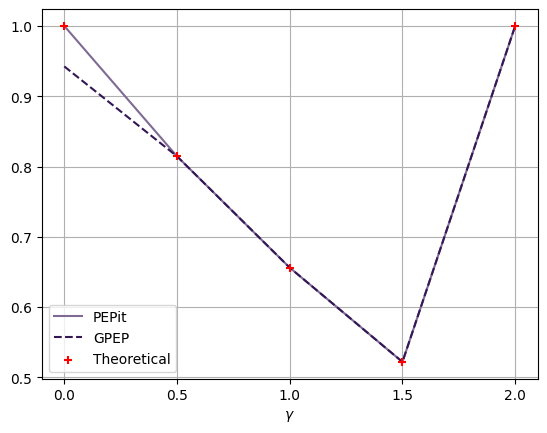

In [8]:
plt.plot(gammas, pepit_taus, color="#7F6A93", label="PEPit")
plt.plot(gammas, gpep_taus, color="#341655", linestyle="--", label="GPEP")
plt.scatter(gammas, theoretical_taus, marker='+', color='r', label="Theoretical", zorder=9)
plt.xlabel("$\gamma$")
plt.xticks(gammas)
plt.grid("on")
plt.legend()